Case Study 1:
Present your view on the different techniques you have employed to do outlier analysis, handling missing data,
feature engineering, feature importance and improving the accuracy of the model both from a classifier as well as a
regressor. Use any sample data and present your POV in a well-structured presentation.

In [8]:
import pandas as pd

df = pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
df.describe()

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Descriptive Statistics:

Number of duplicate rows:
0


In [10]:
print("Missing values percentage:")
print(missing_percentage[missing_percentage > 0])

# Impute missing values in 'total_bedrooms' with its median
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values percentage:
total_bedrooms    1.002907
dtype: float64

Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/tmp/ipython-input-3517965585.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


In [11]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage:")
print(missing_percentage[missing_percentage > 0])

# Impute missing values in 'total_bedrooms' with its median
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_total_bedrooms)

print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values percentage:
Series([], dtype: float64)

Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns

print("Numerical columns selected for outlier detection:")
print(numerical_cols.tolist())

Numerical columns selected for outlier detection:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


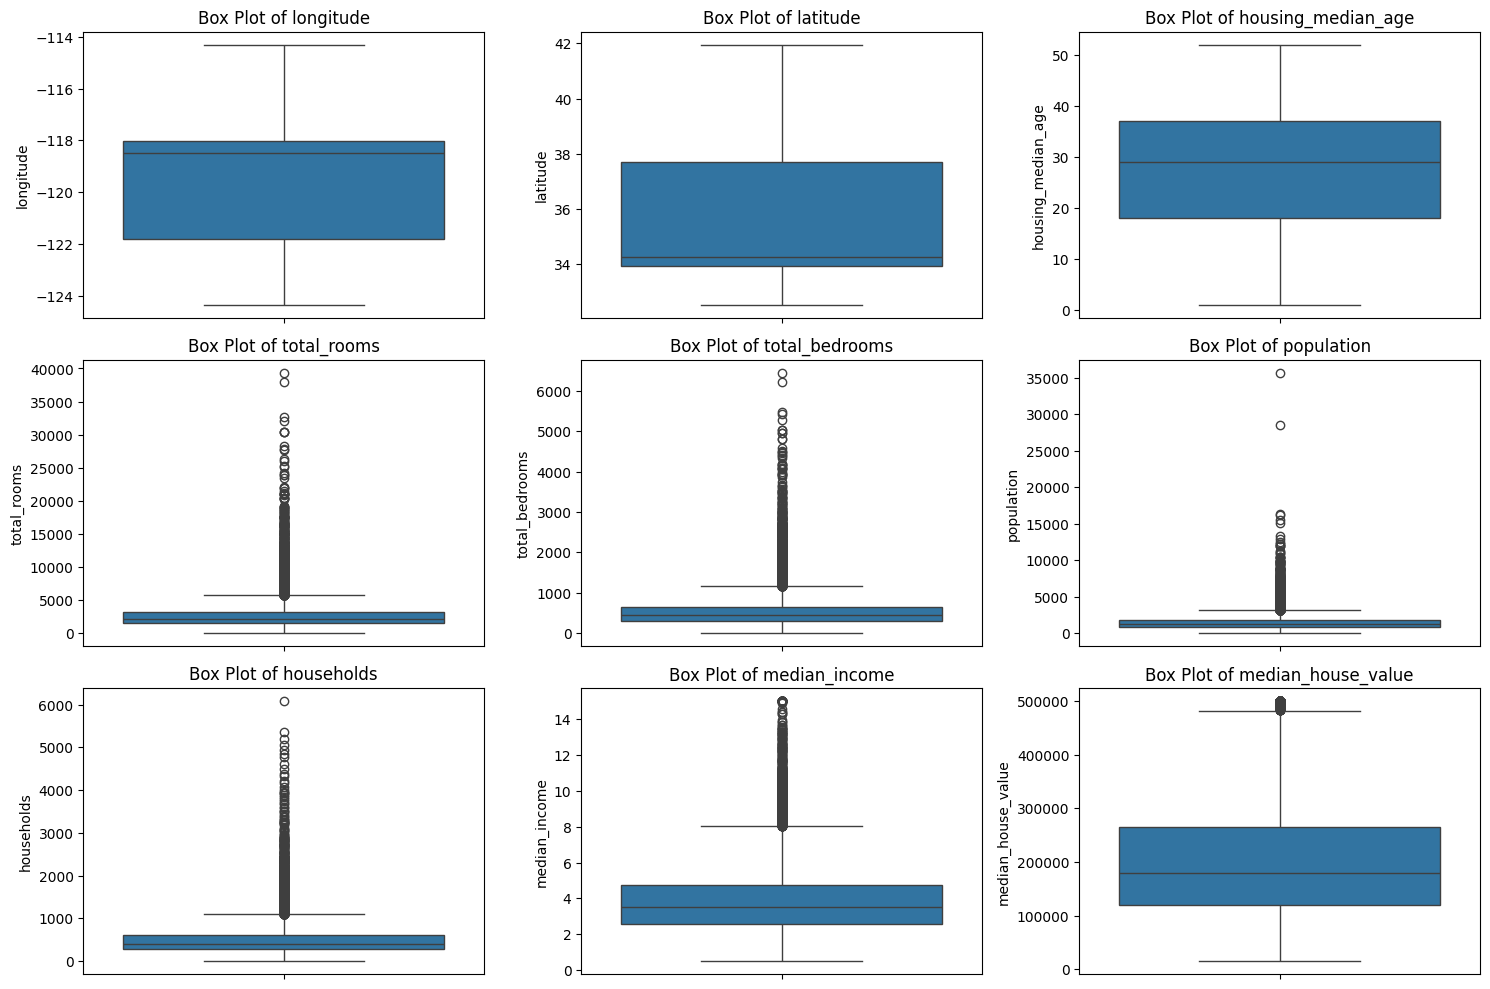

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [14]:
Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 for total_rooms: {Q1}")
print(f"Q3 for total_rooms: {Q3}")
print(f"IQR for total_rooms: {IQR}")

Q1 for total_rooms: 1447.75
Q3 for total_rooms: 3148.0
IQR for total_rooms: 1700.25


In [15]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print(f"Upper bound for total_rooms: {upper_bound}")
print(f"Lower bound for total_rooms: {lower_bound}")

df['total_rooms'] = df['total_rooms'].clip(lower=lower_bound, upper=upper_bound)

print("\nOutliers in 'total_rooms' capped.")
print(df['total_rooms'].describe())

Upper bound for total_rooms: 5698.375
Lower bound for total_rooms: -1102.625

Outliers in 'total_rooms' capped.
count    20640.000000
mean      2441.692472
std       1397.790038
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max       5698.375000
Name: total_rooms, dtype: float64


In [16]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

print("New features created:")
print(df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head())

New features created:
   rooms_per_household  bedrooms_per_room  population_per_household
0             6.984127           0.146591                  2.555556
1             5.007359           0.194090                  2.109842
2             8.288136           0.129516                  2.802260
3             5.817352           0.184458                  2.547945
4             6.281853           0.172096                  2.181467


In [17]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False)

print("DataFrame after one-hot encoding 'ocean_proximity':")
print(df.head())

DataFrame after one-hot encoding 'ocean_proximity':
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0      880.000           129.0   
1    -122.22     37.86                21.0     5698.375          1106.0   
2    -122.24     37.85                52.0     1467.000           190.0   
3    -122.25     37.85                52.0     1274.000           235.0   
4    -122.25     37.85                52.0     1627.000           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0             6.984127           0.146591

In [18]:
from sklearn.model_selection import train_test_split

# 1. Separate target variable and features
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (16512, 16)
X_test shape: (4128, 16)
y_train shape: (16512,)
y_test shape: (4128,)


In [19]:
from sklearn.preprocessing import StandardScaler

# 3. Identify numerical features for scaling (all except one-hot encoded ocean_proximity columns)
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
one_hot_encoded_features = [col for col in X_train.columns if 'ocean_proximity' in col]

features_to_scale = [f for f in numerical_features if f not in one_hot_encoded_features]

print(f"Features to be scaled: {features_to_scale}")

# 4. Initialize StandardScaler
scaler = StandardScaler()

# 5. Fit the scaler to the numerical features of the training set and transform both training and testing numerical features
X_train_scaled = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled = scaler.transform(X_test[features_to_scale])

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features_to_scale, index=X_test.index)

# 6. Reconstruct the training and testing feature sets
X_train = pd.concat([X_train_scaled_df, X_train[one_hot_encoded_features]], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test[one_hot_encoded_features]], axis=1)

print("\nShape of X_train after scaling and reconstruction:", X_train.shape)
print("Shape of X_test after scaling and reconstruction:", X_test.shape)
print("\nX_train head after scaling:")
print(X_train.head())

Features to be scaled: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

Shape of X_train after scaling and reconstruction: (16512, 16)
Shape of X_test after scaling and reconstruction: (4128, 16)

X_train head after scaling:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.272587 -1.372811            0.348490     0.484375        0.211228   
8267    0.709162 -0.876696            1.618118     0.667355        0.593094   
17445  -0.447603 -0.460146           -1.952710    -0.394072       -0.495226   
14265   1.232698 -1.382172            0.586545    -0.734300       -0.409306   
2271   -0.108551  0.532084            1.142008    -0.047410       -0.256559   

       population  households  median_income  rooms_per_household  \
14196    0.768276    0.322906      -0.326196            -0.129648   
8267    -0.0

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Instantiate RandomForestRegressor
# Using n_estimators=100 as a common default, random_state for reproducibility
model = RandomForestRegressor(n_estimators=100, random_state=42)

print("RandomForestRegressor model instantiated.")

RandomForestRegressor model instantiated.


Training the model...
Model training complete.

Mean Squared Error (MSE): 2555928455.48
R-squared (R2): 0.80


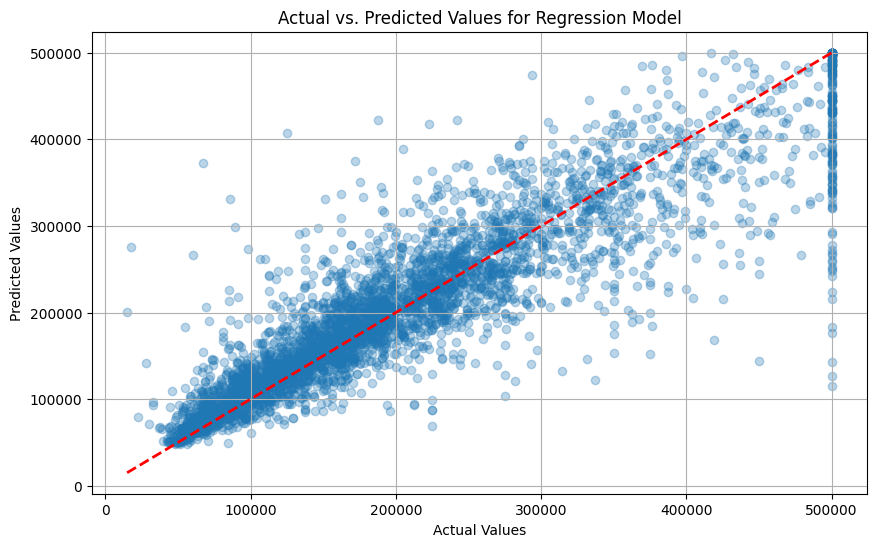

In [21]:
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Regression Model')
plt.grid(True)
plt.show()

In [22]:
feature_importances = model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances:")
print(importance_df.head(10))

Top 10 Feature Importances:
                     Feature  Importance
7              median_income    0.482094
12    ocean_proximity_INLAND    0.137490
10  population_per_household    0.121920
0                  longitude    0.058123
1                   latitude    0.056419
2         housing_median_age    0.044479
8        rooms_per_household    0.024352
9          bedrooms_per_room    0.022988
3                total_rooms    0.012935
4             total_bedrooms    0.012349


/tmp/ipython-input-403874356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


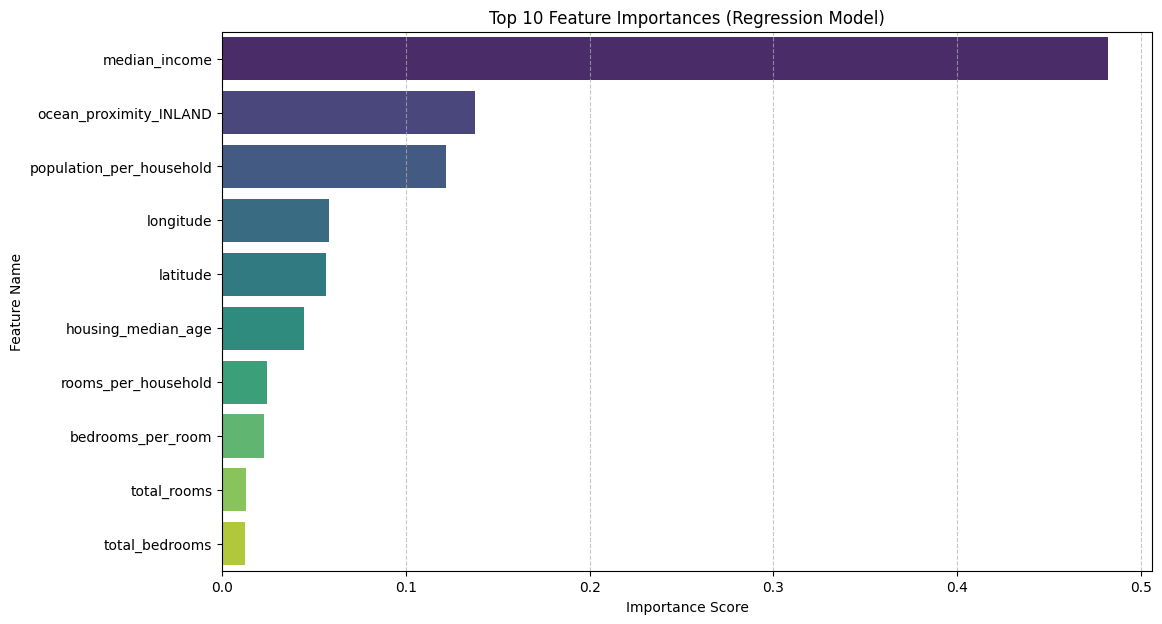

In [23]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Regression Model)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

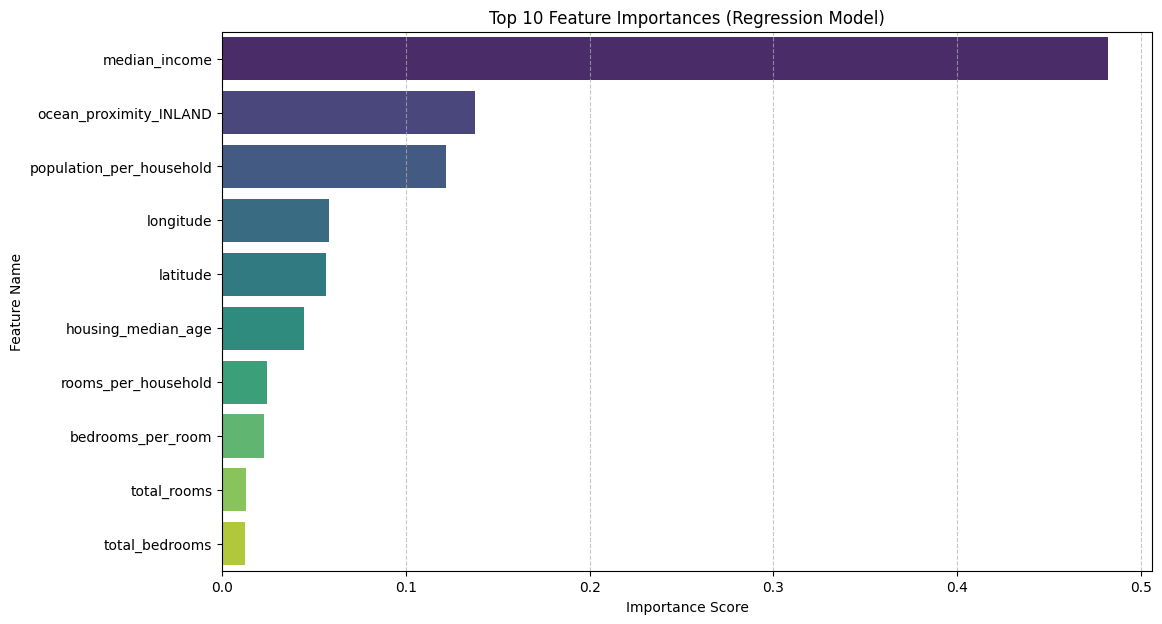

In [24]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Feature Importances (Regression Model)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [25]:
median_value = df['median_house_value'].median()
df['median_house_value_category'] = df['median_house_value'].apply(lambda x: 'High Value' if x > median_value else 'Low Value')

print(f"Median house value used for classification: {median_value}")
print("Distribution of new target variable:")
print(df['median_house_value_category'].value_counts())

Median house value used for classification: 179700.0
Distribution of new target variable:
median_house_value_category
Low Value     10323
High Value    10317
Name: count, dtype: int64


In [26]:
from sklearn.model_selection import train_test_split

# 3. Separate target variable and features for classification
X_clf = df.drop(['median_house_value', 'median_house_value_category'], axis=1)
y_clf = df['median_house_value_category']

# 4. Split data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

print(f"X_clf shape: {X_clf.shape}")
print(f"y_clf shape: {y_clf.shape}")
print(f"X_train_clf shape: {X_train_clf.shape}")
print(f"X_test_clf shape: {X_test_clf.shape}")
print(f"y_train_clf shape: {y_train_clf.shape}")
print(f"y_test_clf shape: {y_test_clf.shape}")

X_clf shape: (20640, 16)
y_clf shape: (20640,)
X_train_clf shape: (16512, 16)
X_test_clf shape: (4128, 16)
y_train_clf shape: (16512,)
y_test_clf shape: (4128,)


In [27]:
from sklearn.preprocessing import StandardScaler

# 5. Identify numerical features for scaling (all numeric except one-hot encoded ocean_proximity columns)
numerical_features_clf = X_train_clf.select_dtypes(include=['number']).columns.tolist()
one_hot_encoded_features_clf = [col for col in X_train_clf.columns if 'ocean_proximity' in col]

features_to_scale_clf = [f for f in numerical_features_clf if f not in one_hot_encoded_features_clf]

print(f"Features to be scaled for classification: {features_to_scale_clf}")

# 6. Initialize StandardScaler
scaler_clf = StandardScaler()

# 7. Fit the scaler to the numerical features of the training set and transform both training and testing numerical features
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf[features_to_scale_clf])
X_test_clf_scaled = scaler_clf.transform(X_test_clf[features_to_scale_clf])

# 8. Convert scaled arrays back to DataFrames with original column names and indices
X_train_clf_scaled_df = pd.DataFrame(X_train_clf_scaled, columns=features_to_scale_clf, index=X_train_clf.index)
X_test_clf_scaled_df = pd.DataFrame(X_test_clf_scaled, columns=features_to_scale_clf, index=X_test_clf.index)

# 9. Reconstruct the training and testing feature sets
X_train_clf = pd.concat([X_train_clf_scaled_df, X_train_clf[one_hot_encoded_features_clf]], axis=1)
X_test_clf = pd.concat([X_test_clf_scaled_df, X_test_clf[one_hot_encoded_features_clf]], axis=1)

print("\nShape of X_train_clf after scaling and reconstruction:", X_train_clf.shape)
print("Shape of X_test_clf after scaling and reconstruction:", X_test_clf.shape)
print("\nX_train_clf head after scaling:")
print(X_train_clf.head())

Features to be scaled for classification: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

Shape of X_train_clf after scaling and reconstruction: (16512, 16)
Shape of X_test_clf after scaling and reconstruction: (4128, 16)

X_train_clf head after scaling:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.272587 -1.372811            0.348490     0.484375        0.211228   
8267    0.709162 -0.876696            1.618118     0.667355        0.593094   
17445  -0.447603 -0.460146           -1.952710    -0.394072       -0.495226   
14265   1.232698 -1.382172            0.586545    -0.734300       -0.409306   
2271   -0.108551  0.532084            1.142008    -0.047410       -0.256559   

       population  households  median_income  rooms_per_household  \
14196    0.768276    0.322906      -0.326196      

Training the classification model...
Classification model training complete.

Classification Model Performance:
Accuracy: 0.89
Precision: 0.89
Recall: 0.90
F1-Score: 0.89


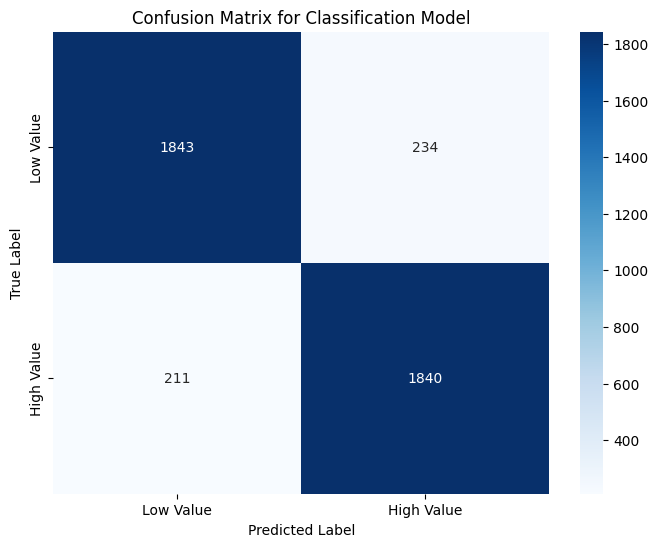

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Instantiate RandomForestClassifier
model_clf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Training the classification model...")
# 2. Train the model
model_clf.fit(X_train_clf, y_train_clf)
print("Classification model training complete.")

# 3. Make predictions on the test set
y_pred_clf = model_clf.predict(X_test_clf)

# 4. Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, pos_label='High Value')
recall = recall_score(y_test_clf, y_pred_clf, pos_label='High Value')
f1 = f1_score(y_test_clf, y_pred_clf, pos_label='High Value')

print(f"\nClassification Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# 5. Generate and display Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf, labels=['Low Value', 'High Value'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Value', 'High Value'], yticklabels=['Low Value', 'High Value'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Classification Model')
plt.show()

Top 10 Feature Importances for Classification Model:
                     Feature  Importance
7              median_income    0.225501
12    ocean_proximity_INLAND    0.134151
10  population_per_household    0.107452
0                  longitude    0.103642
1                   latitude    0.094508
9          bedrooms_per_room    0.077344
8        rooms_per_household    0.046469
2         housing_median_age    0.040068
5                 population    0.033983
3                total_rooms    0.032852


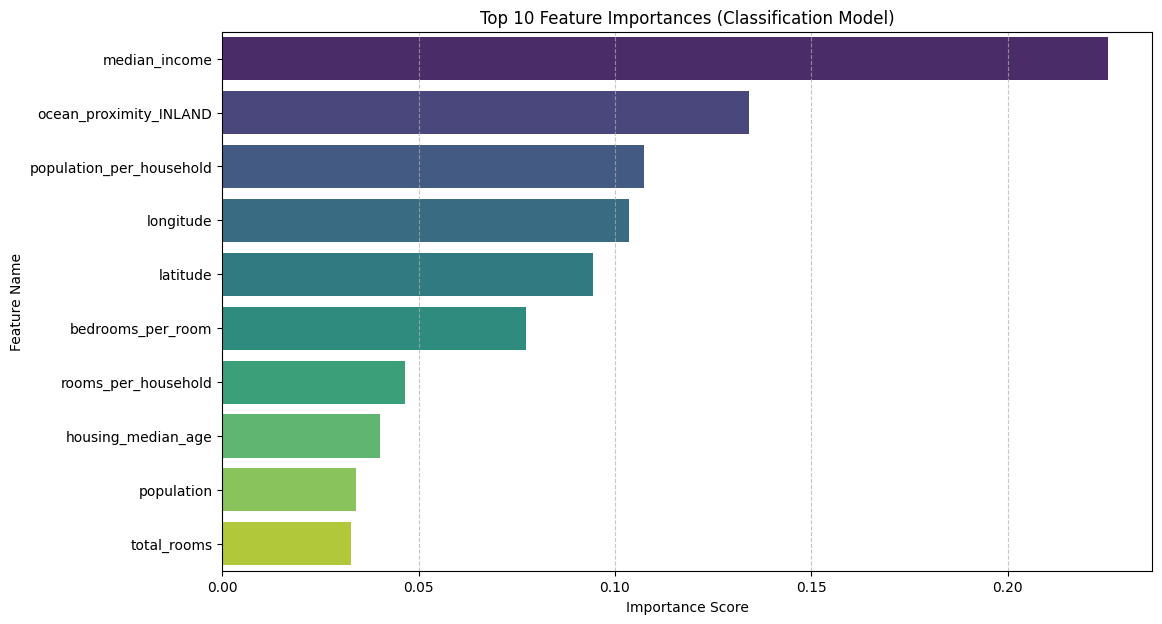

In [29]:
feature_importances_clf = model_clf.feature_importances_
features_clf = X_train_clf.columns

importance_df_clf = pd.DataFrame({'Feature': features_clf, 'Importance': feature_importances_clf})
importance_df_clf = importance_df_clf.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances for Classification Model:")
print(importance_df_clf.head(10))

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df_clf.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Feature Importances (Classification Model)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()